In [28]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

%config InlineBackend.figure_format = 'svg'

In [29]:
#Loading the data:

start, end, flux, error = np.loadtxt("Circinus_X-1_10.0-20.0keV_gsclc.txt", unpack=True)
print (start, end, flux, error)

[55238.784919 55260.012078 55260.520637 ... 60770.101539 60770.553275
 56322.833493] [58969.561034 55260.205758 55260.967975 ... 60770.491551 60770.878762
 60813.759468] [ 0.002246 -0.003346  0.009985 ...  0.107428  0.056343  0.054838] [0.00102  0.009145 0.00663  ... 0.015616 0.01559  0.001593]


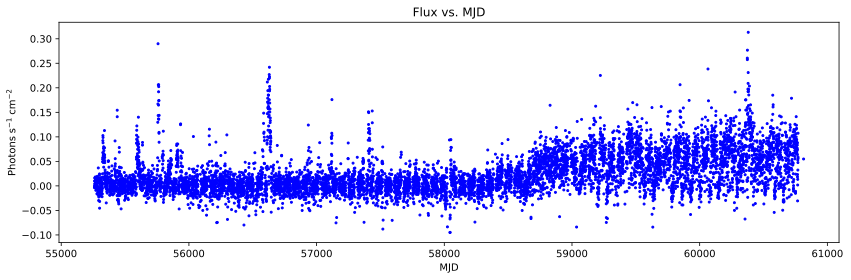

In [30]:
#Plotting the original data ("end" date array):
#NOTE: using the "start" date array gives the same result.

plt.figure(figsize=(12,4))
plt.plot(end, flux, 'o', color="blue", markersize=2)
plt.xlabel(r"MJD")
plt.ylabel(r'$\mathrm{Photons\;s^{-1}\;cm^{-2}}$')
plt.title('Flux vs. MJD')

plt.tight_layout()
plt.savefig('Cir_X-1_10-20keV.pdf',bbox_inches='tight') 
#plt.savefig('DataA.png',bbox_inches='tight',dpi=600)
plt.show()

## Ephemeris is: MJD_n = 50082.04 + (16.54694 - 3.53e-5 * N) * N

### (converting from MJD to N cycles)

In [31]:
#Putting original data into an array:
#NOTE: this is useless
orgdata = np.array([start, end, flux, error])



#printing to see if data appears:
print("start date:", start)
print("end date:", end)
print("flux:", flux)
print("error:", error)

start date: [55238.784919 55260.012078 55260.520637 ... 60770.101539 60770.553275
 56322.833493]
end date: [58969.561034 55260.205758 55260.967975 ... 60770.491551 60770.878762
 60813.759468]
flux: [ 0.002246 -0.003346  0.009985 ...  0.107428  0.056343  0.054838]
error: [0.00102  0.009145 0.00663  ... 0.015616 0.01559  0.001593]


In [32]:
# Ephemeris: MJD_n = 50082.04 + (16.54694 - 3.53e-5 * N) * N

MJD_n = np.atleast_1d(start).ravel().astype(float)
MJD_0 = 50082.04 
P_0 = 16.54694
k = 3.53e-5

MJD_n = np.atleast_1d(MJD_n).ravel().astype(float)

# Quadratic: a*N^2 + b*N + c = 0
# k*N^2 - P_0^N + (MJD_n - MJD_0) = 0

def ephemeris(MJD): 
    a = k
    b = -P_0
    c = MJD - MJD_0
    
    root = np.roots([a, b, c])
    for r in root:
        if np.isreal(r) and 0 < r.real < 1e4:
            return float(r.real)
    return np.nan

N_list = [ephemeris(MJD) for MJD in MJD_n]
N_vals = np.array(N_list) #putting the directly above into an array
N_ints = np.round(N_vals).astype(int)
print("N values, unrounded:", N_vals)
print("N_ints, rounded:", N_ints)

#MEANING:
#np.atleast_1d(start_date).ravel().astype(float) - if values are scalars, turns them into 1D array, .ravel() makes them 1D, 
    #.astype(float) makes them float. values become flat NumPy array of floats.

#np.roots([a, b, c1]) - makes the code treat the coefficients of a polynomial (ax^2 + bx + c = 0). np.roots makes the values
    #into a 2-array, which has the two roots of the quadratic.

#if np.isreal(r) and 0 < r.real < 1e4 - chooses between the two roots of the quadratic for one that makes physical sense.
    #np.isreal(r) looks for imaginary numbers (returns non-imaginary numbers), if r is real then .real only gives that value,
    #0 < r.real < 1e4 values are between 0 and 10,000

#return np.nan - not a number (so, there's no valid number that can be computed. returns this if this is the case).

#[ephemeris(MJD) for MJD in MJD_n_start] - goes over each element in MJD in MJD_n_start, calls ephemeris(MJD) for 
    #each element, collects the values into a list.

#np.round(N_vals_start).astype(int) - np.round(N_vals_start) rounds each element to the nearest integer, which returns 
    #a new array of floats, .astype(int) makes the floats to integers (ex: 14.0 to 14).

N values, unrounded: [311.85088472 313.1354424  313.16621785 ... 646.8162721  646.84364793
 377.46090345]
N_ints, rounded: [312 313 313 ... 647 647 377]


In [33]:
# MJD_n = 50082.04 + (16.54694 - 3.53e-5 * N) * N

# END date (redundant because the plot will be the same):
MJD_n_end = np.atleast_1d(end).ravel().astype(float)
MJD_0 = 50082.04
P_0 = 16.54694
k = 3.53e-5

MJD_n_end = np.atleast_1d(MJD_n_end).ravel().astype(float)

# Quadratic: a*N^2 + b*N + c = 0
# k*N^2 - P_0^N + (MJD_n - MJD_0) = 0

def ephemeris(MJD):
    a = k
    b = -P_0
    c2 = MJD - MJD_0
    
    root = np.roots([a, b, c2])
    for r in root:
        if np.isreal(r) and 0 < r.real < 1e4:
            return float(r.real)
    return np.nan


N_list_end = [ephemeris(MJD) for MJD in MJD_n_end]
N_vals_end = np.array(N_list_end)
N_ints = np.round(N_vals_end).astype(int)
print("N values, unrounded:", N_vals_end)
print("N_ints, rounded:", N_ints)

N values, unrounded: [537.72649331 313.14716295 313.1932885  ... 646.83990737 646.86337289
 649.46201776]
N_ints, rounded: [538 313 313 ... 647 647 649]


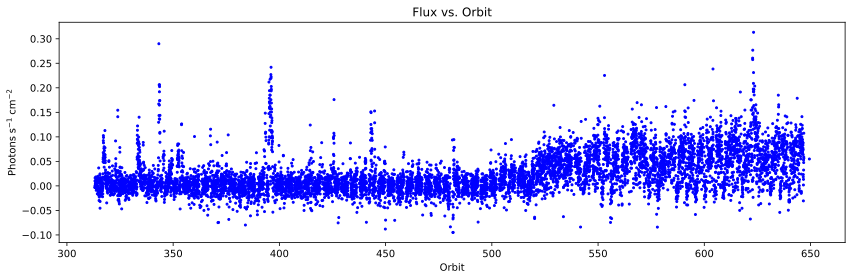

In [34]:
#Plotting Flux vs. Orbit ("end" date, redundant):

plt.figure(figsize=(12,4))
plt.plot(N_vals_end, flux, 'o', color="blue", markersize=2)
plt.xlabel(r"Orbit")
plt.ylabel(r'$\mathrm{Photons\;s^{-1}\;cm^{-2}}$')
plt.title('Flux vs. Orbit')

plt.tight_layout()
plt.savefig('Cir_X-1_10-20keV_FLUXORBIT.pdf',bbox_inches='tight') 
#plt.savefig('DataA.png',bbox_inches='tight',dpi=600)
plt.show()

#### DATA SHAPE: (8747, 5)
phase: [0.85088472 0.1354424  0.16621785 ... 0.8162721  0.84364793 0.46090345]


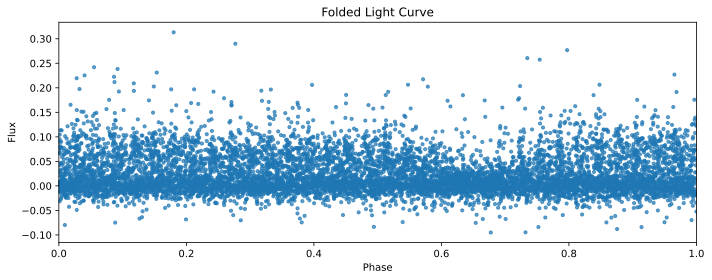

In [38]:
#Converting from N cycles to phase:

N_vals_file = N_vals
N_vals_end_file = N_vals_end
flux_file        = flux1  
error_file      = error1   
phase = N_vals - np.floor(N_vals)

arrays = [N_vals, N_vals_end, flux, error, phase]
clean   = []
for arr in arrays:
    a = np.atleast_1d(arr).ravel()
    clean.append(a)


lengths = [a.shape[0] for a in clean]
if len(set(lengths)) != 1:
    raise ValueError(f"Input arrays must all have same length; got lengths {lengths}")


#Saving Flux vs. N cycles data as a txt file: 
data = np.column_stack(clean)
np.shape(data)
print("#### DATA SHAPE:", np.shape(data) )
np.savetxt(
    'N_phase_10-20keV.txt',
    data,
    #fmt=('%d', '%d', '%.6e', '%.6e' , '%.6e'),
    header='#Column 1: start date  #Column 2: end date  #Column 3: Flux  #Column 4: Uncertainty  #Column 5: Phase',
    comments=''    # no leading '#'
)

#Finding the phase + plotting the flux vs. phase: 
#N - int(N): 
#phase = N_vals_start - np.floor(N_vals_start)

print ("phase:", phase)

#Plotting Flux vs. phase:
plt.figure(figsize=(10,4))
plt.scatter(phase, flux, s=10, alpha=0.7) # s -  , alpha- 
plt.xlabel('Phase')
plt.ylabel('Flux')
plt.title('Folded Light Curve')
plt.xlim(0,1)

phase_flat = phase.ravel()
flux_flat  = flux.ravel()

phase1 = np.column_stack((phase_flat, flux_flat))

#Saving Flux vs. phase data as a txt file:
np.savetxt(
    'phase_10-20keV.txt',
    phase1,
    #fmt=('%.6f','%.6e'),
    header='#Column 1: Phase  #Column 2: Flux',
    comments=''
)

plt.tight_layout()
plt.savefig('Cir_X-1_10-20keV_PHASE.pdf',bbox_inches='tight') 
#plt.savefig('DataA.png',bbox_inches='tight',dpi=600)
plt.show()


#MEANING:
#arrays = [N_vals_start, N_vals_end, flux, error] - creates a list called arrays that has four elements. makes 4 separate 
    #arrays into one list/

#clean   = [] - makes an empty list and puts it into the variable clean. it collects the input arrays (after making them 1D
    #and puts them into a list.

#clean.append(a) - adds (a) as an element into the variable clean.

#lengths = [a.shape[0] for a in clean] - loops over the (a) array in the clean list. tells how many elements are in clean.

#if len(set(lengths)) != 1 - checks if the arrays have the same length.

#raise ValueError(f"Input arrays must all have same length; got lengths {lengths}") - says if an error happens, ValueError
    #says that a function has the right type but wrong value, everything in lengths is converted to text and placed in place
    #of {lengths}. so, all arrays must be the same length.

#data = np.column_stack(clean) - takes the 1D arrays and makes them into 2D array.

#N_vals_start - np.floor(N_vals_start) - takes the fractional part of each element in N_vals_start, returns largest integer
    #in that element.

#phase.ravel() - makes phase array 1D.

#np.column_stack((phase_flat, flux_flat)) - takes the two 1D arrays and makes them into a single 2D array.

